In [17]:
import filecmp
import os
import subprocess
import tempfile
import numpy as np
import scipy
from scipy.io import wavfile

path_to_ESC = './ESC-50-master/audio'
#os.listdir(path_to_ESC)

y = [45,22] # train vs clapping

X_data = []
y_data = []

for file in os.listdir(path_to_ESC):
    if file.split('.')[1] == 'wav':
        if int(file.split('.')[0].split('-')[-1]) in y:
            rate, audio = wavfile.read(path_to_ESC +'/'+ file)
            X_data.append(audio)
            y_data.append(file.split('.')[0].split('-')[-1])
            

In [19]:
X_data_f = []
for i in X_data:
    X_data_f.append(np.fft.fft(X_data))

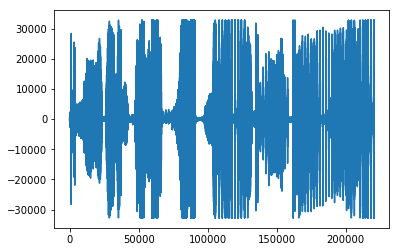

In [8]:
import matplotlib.pyplot as plt

plt.plot(X_data[0])
plt.show()

In [20]:
plt.plot(X_data_f[0])
plt.show()

/Users/qcat/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


KeyboardInterrupt: 

In [2]:
from sklearn.decomposition import DictionaryLearning
dict = DictionaryLearning(n_components=100, alpha=1, n_iter=500)


'./ESC-50-master/audio'

In [16]:
a = [[1,3,3],
    [2,4,5]]

In [18]:
np.array(a).shape

(2, 3)